# Analyzing HTSeq Data Using Two Differential Expression Modules

The main goals of this project are:
- Analyze HTSeq count data with tools that assume an underlying [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution) on the data.
- Analyze HTSeq count data with tools that assume an underlying [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) on the data.
- Analyze [normalized HTSeq count](http://software.broadinstitute.org/cancer/software/genepattern/modules/docs/PreprocessReadCounts/1) data with tools that assume an underlying [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) on the data.
- Compare the results of differential gene expression analysis under the three scenarios above.

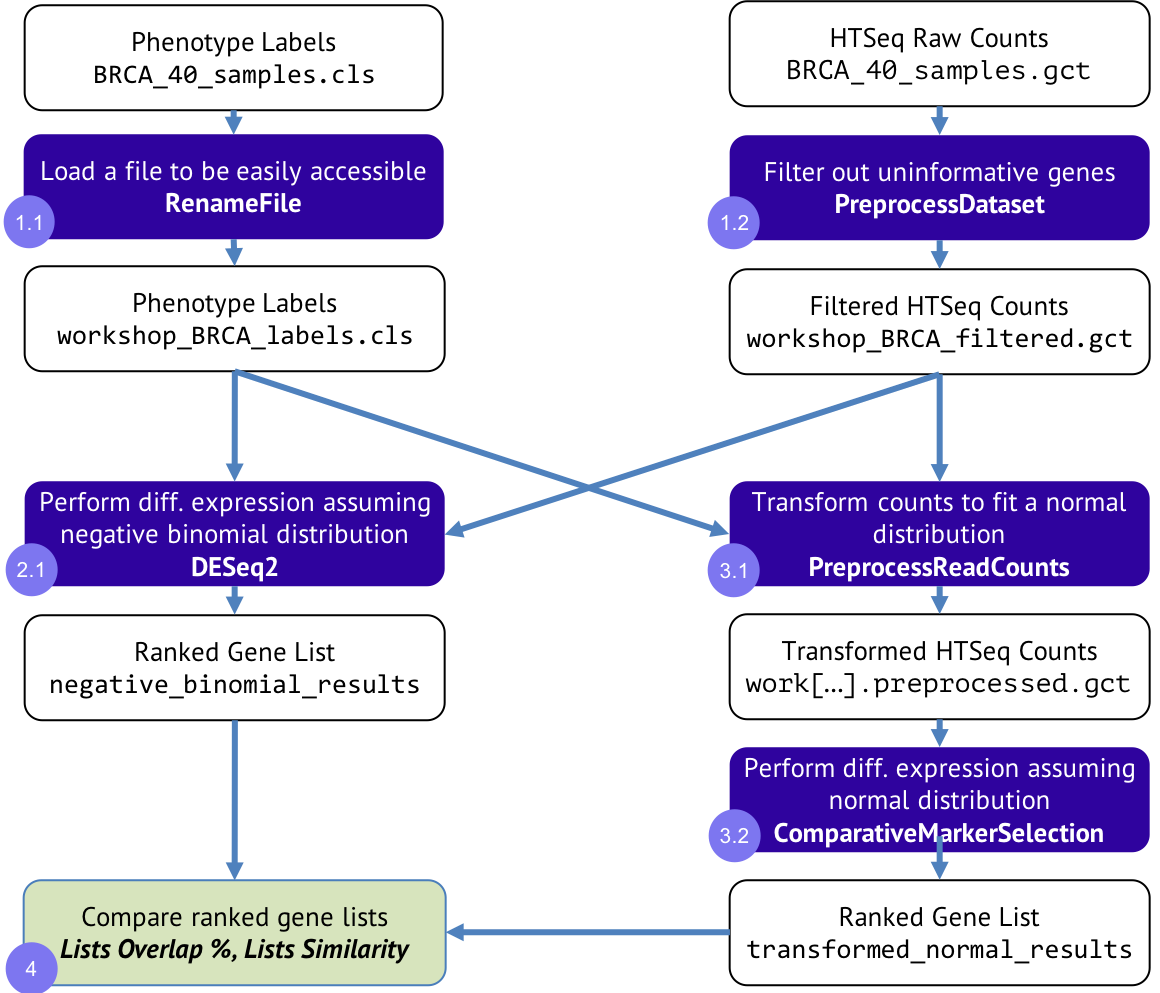

<!-- 
<img src="https://datasets.genepattern.org/data/ccmi_tutorial/2018-03-14/class_project_images/CCMI_workshop_project_overview_noNB.png" width="80%"> 
--> 

In [1]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

<div class="well">
Note: For this notebook make sure you log in to **Broad Institute**
</div>

---

## Section 1: Load and Filter the Dataset

In brief, the dataset we will use in this notebook is RNA-Seq counts downloaded from TCGA. We have selected 40 samples of Breast Invasive Carcinoma (BRCA), 20 of those samples come from tumor tissue and 20 come from their corresponging normal tissue.

### 1.1 Load the CLS file for future use by using the **RenameFile** GenePattern function.

In order to make the phenotype labels file (the CLS file) easily accessible in the GenePattern modules on this notebook, we will use a Python function wrapped in a GenePattern UIBuilder cell titled **`Load URL Into Notebook {}`** using this function is as simple as typing the url which contains the data we want to load
<div class="alert alert-info">
<ul>
<li>**url**: Drag and drop the link to [this CLS file](https://datasets.genepattern.org/data/TCGA_BRCA/WP_0_BRCA_cp_40_samples.cls)  
*Note: It should display the file's url after you have done so.*  
</ul>
</div>

In [2]:
@genepattern.build_ui(name="Load URL Into Notebook",
                      parameters={
                          "url": {"default":"https://datasets.genepattern.org/data/TCGA_BRCA/WP_0_BRCA_cp_40_samples.cls"},
                          "output_var":{"default":"", "hide":True}
                                 })
def load_data_from_url(url):
    """This simple function """
    return genepattern.GPUIOutput(files=[url])

UIBuilder(description='This simple function ', function_import='load_data_from_url', name='Load URL Into Noteb…

<div class="well">
*Note:* you can use this function to load data from an URL in any of your notebooks
</div>

### 1.2 Filter out uninformative genes

<div class="alert alert-info">

<p>In order to remove the uninformative genes from the the HTseq dataset (i.e., the rows in the GCT file with the smallest variance), create a new cell below this one and use the <strong>PreprocessDataset*</strong> GenePattern module with these parameters:</p>

<ul>
	<li><strong>input filename</strong>: Drag and drop the link to <a href="https://datasets.genepattern.org/data/TCGA_BRCA/WP_0_BRCA_cp_40_samples.gct" target="_blank">this GCT file</a><br />
	<em>Note: It should display the file&#39;s url after you have done so.</em></li>
	<li><strong>output filename: workshop_BRCA_filtered.gct</strong></li>
    <li><strong>ceiling: </strong> 20000000.
    <br />
	<em>Note: The default value is 20,000 we are chaning this value to 20,000,000.</em></li>

	<li>The rest of the parameters can be left as default.</li>
</ul>
</div>

---

## Section 2: Analyzing HTseq Counts Using DESeq2

The results you generate in this section will be used as the reference for comparison later in this notebook and will be refered to as **`DESeq2_results`**.

### 2.1 Perform differential gene expression using DESeq2 

<div class="alert alert-info">
Create a new cell bellow this one and use the **DESeq2** GenePattern module using the following parameters:
<ul>
<li>**input file**: From the dropdown menu, choose the output from the PreprocessDataset module (i.e., **workshop_BRCA_filtered.gct** if you used the suggested parameters in section 1).</li>
<li>**cls file**: From the dropdown menu, choose the output from the **`Load URL Into Notebook {}`** UIBuilder cell (i.e., **WP_0_BRCA_cp_40_samples.cls** if you used the suggested parameters in section 1).</li>
<li>Click on **Run** and move on to step 2.2 of this section once the job is complete.   </li></ul>
</div>

### 2.2 Extract top 25 differentially expressed genes and save them to a DataFrame for later use

<div class="alert alert-info">We will parse the one of the TXT files from the previous cell (<strong>DESeq2</strong>) and extract only the information that we want (i.e., the name and rank of the 100 most differentially expressed genes) and save that list in a python dictionary named <strong><code>DESeq2_results</code></strong>. To do so, we are using the GenePattern UI Buildier in the next cell. Feel free to check out the underlying code if you want. Set the input parameters as follows:

<ul>
	<li>Send the <strong>first output</strong> of <strong>DESeq2</strong> to Extract Ranked Gene List From TXT GenePattern Variable { }
	<ul>
		<li>Hint: the name of the file should be <strong>workshop_BRCA_filtered.normal.vs.tumor.DESeq2_results_report.txt</strong></li>
		<li>Click the &quot;i&quot; icon and on the dropdown menu that appears click under <strong>&quot;Send to Existing GenePattern Cell&quot;</strong> from that menu, select <strong>&quot;Extract Ranked Gene List From TXT GenePattern Variable { }&quot;</strong></li>
		<li>Alternatively, choose that TXT file from the dropdown menu of the cell below.</li>
	</ul>
	</li>
	<li><strong>file var</strong>: the action just before this one should have populated this parameter with a long URL similar to this one: <em>https://gp-beta-ami.genepattern.org/gp/jobResults/1234567/workshop_BRCA_filtered.normal.vs.tumor.DESeq2_results_report.txt</em>.</li>
	<li><strong>number of genes</strong>: 25 (default)</li>
	<li><strong>verbose</strong>: true (default)</li>
	<li>Confirm that the <strong>output variable</strong> is is set to be <strong>DESeq2_results</strong></li>
	<li>Run the cell.</li>
</ul>
</div>


In [3]:
import genepattern
@genepattern.build_ui(name="Extract Ranked Gene List From TXT GenePattern Variable",
                       parameters={
                                    "file_var": {
                                                 "type": "file",
                                                 "kinds": ["txt"],
                                    },
                                   "number_of_genes": {"default":25},
                                   "output_var": {"default":"DESeq2_results"},
                        })
def extract_genes_from_txt(file_var:'URL of the results_report_txt file from DESeq2', 
                           number_of_genes:'How many genes to extract'=100, 
                           verbose:'Whether or not to print the gene list'=True):
    
    genes_dict = {}  # Initializing the dictionary of genes and rankings
    
    # Get the job number and name of the file
    temp = file_var.split('/')
    # programatically access that job to open the file
    gp_file = eval('job'+temp[5]+'.get_file("'+temp[6]+'")')
    py_file = gp_file.open()
    py_file.readline()
    
    rank = 1
    for line in py_file.readlines():
        formatted_line = str(line,'utf-8').strip('\n').split('\t')
        genes_dict[formatted_line[0]] = rank
        if rank >= number_of_genes:
            break
        rank += 1
    
    if verbose:
        # For display only
        for gene in genes_dict:
            print("{}: {}".format(genes_dict[gene],gene))
    
    return genes_dict

UIBuilder(function_import='extract_genes_from_txt', name='Extract Ranked Gene List From TXT GenePattern Variab…

---

## Section 3: Analyzing HTSeq Counts Using ComparativeMarkerSelection

These results will be used for comparison later in this notebook and will be refered to as **`CMS_results`**

### 3.1 Transform HTSeq counts by using VoomNormalize

<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>
Create a new cell bellow this one and use the <strong>VoomNormalize</strong> GenePattern module with the following parameters:

<ul>
	<li><strong>input file</strong>: The output from the <strong>PreprocessDataset</strong> module (i.e., <strong>workshop_BRCA_filtered.gct</strong> if you used the suggested parameters in section 1).</li>
	<li><strong>cls file</strong>: The output from the <strong>`Load URL Into Notebook {}`</strong> UIBuilder cell (i.e., <strong>WP_0_BRCA_cp_40_samples.cls</strong> is you used the suggested parameters in section 1).</li>
	<li><strong>output file</strong>: leave as default.</li>
</ul>
</div>

### 3.2 Perform differential gene expression analysis on transformed counts using ComparativeMarkerSelection

<div class="alert alert-info">Create a new cell bellow this one and use the <strong>ComparativeMarkerSelection</strong> GenePattern module with the following parameters:

<ul>
	<li><strong>input file</strong>: The output from the <strong>PreprocessReadCounts</strong> module (i.e., <strong>workshop_BRCA_filtered.preprocessed.gct</strong> if you used the suggested parameters in step 5.1 of this section).</li>
	<li><strong>cls file</strong>: The output from the <strong>`Load URL Into Notebook {}`</strong> UIBuilder cell (i.e., <strong>WP_0_BRCA_cp_40_samples.cls</strong> is you used the suggested parameters in section 1).</li>
	<li>The rest of the parameters can be left as default.</li>
</ul>
</div>


### 3.3 Extract top 100 genes and save to a dictionary for later use.

<div class="alert alert-info">
<p>We will parse the ODF file from the <strong>ComparativeMarkerSelection</strong> you just ran (using the <strong>preprocessed</strong> data) and extract only the information that we want (i.e., the name and rank of the 100 most differentially expressed genes) and save that list in a python dictionary named <strong><code>transformed_normal_results</code></strong>. To do so, we are using the GenePattern UI Buildier in the next cell. Feel free to check out the underlying code if you want. Set the input parameters as follows:</p>

<ul>
	<li>
	<p>Send the output of <strong>ComparativeMarkerSelection</strong> to Extract Ranked Gene List From ODF GenePattern Variable { }</p>

	<ul>
		<li>Click the &quot;i&quot; icon and on the dropdown menu that appears click under <strong>&quot;Send to Existing GenePattern Cell&quot;</strong> from that menu, select <strong>&quot;Extract Ranked Gene List From ODF GenePattern Variable { }&quot;</strong></li>
		<li>Alternatively, choose that ODF file from the dropdown menu of the cell below.</li>
	</ul>
	</li>
	<li>
	<p><strong>GP ODF</strong>: the action just before this one should have populated this parameter with a long URL similar to this one: <em>https://gp-beta-ami.genepattern.org/gp/jobResults/1234567/workshop_BRCA_filtered.preprocessed.comp.marker.odf</em>.</p>
	</li>
	<li><strong>number of genes</strong>: 100 (default)</li>
	<li><strong>verbose</strong>: true (default)</li>
	<li>Confirm that the <strong>output variable</strong> is is set to be <strong>CMS_results</strong></li>
	<li>Run the cell.</li>
</ul>
</div>


In [4]:
from gp.data import ODF
#transformed_normal_results = custom_CMSreader(**INSERT_THE_VALUE_YOU_COPIED_IN_THE_PREVIOUS_CELL_HERE**, number_of_genes=100)
def custom_CMSreader(GP_ODF:'URL of the ODF output from ComparativeMarkerSelection',
                     number_of_genes:'How many genes to extract'=100, 
                     verbose:'Whether or not to print the gene list'=True):
    
    # Get the job number and name of the file
    temp = GP_ODF.split('/')
    # programatically access that job to open the file
    GP_ODF = eval('ODF(job'+temp[5]+'.get_file("'+temp[6]+'"))')
#     GP_ODF = GP_ODF.dataframe
    GP_ODF = GP_ODF.loc[GP_ODF['Rank']<=number_of_genes,['Rank','Feature']]
    GP_ODF.set_index('Feature', inplace=True)
    to_return = GP_ODF.to_dict()['Rank']
    if verbose:
        # For display only
        genes_list = sorted([[v,k] for k,v in to_return.items()])
        for gene in genes_list:
            print("{}: {}".format(gene[0],gene[1]))
    return to_return
# naive_normal_results = custom_CMSreader(**INSERT_THE_VALUE_YOU_COPIED_IN_THE_PREVIOUS_CELL_HERE**, number_of_genes=100)

genepattern.GPUIBuilder(custom_CMSreader, 
                        name="Extract Ranked Gene List From ODF GenePattern Variable",
                        parameters={
                                    "GP_ODF": {  "name": "Comparative Marker Selection ODF filename",
                                                 "type": "file",
                                                 "kinds": ["Comparative Marker Selection", "odf","ODF"],
                                                 "description":"The output from ComparativeMarkerSelection",
                                            },
                                   "number_of_genes": {"default":25},
                                   "output_var": {"default":"CMS_results"},
                        })

UIBuilder(function_import='custom_CMSreader', name='Extract Ranked Gene List From ODF GenePattern Variable', p…

---

## Section 4: Comparing Results of the Negative Binomial and Transformed Normal Models

In this short section we use the fuction we defined in section 4 to compare the dictionaries which contain the lists of top differentially expressed genes and their ranks. Use the following parameters:  
- **reference list**: DESeq2_results
- **new list**: CMS_results

In [5]:
from scipy.stats import kendalltau as kTau

def compare_dictionaries(reference_list, new_list):
#     print(reference_list)
#     print(new_list)
    # compute how many of the genes in ref are in new
    common = (list(set(reference_list) & set(new_list)))
    
    ref_common = [reference_list[temp] for temp in common]
    new_common = [new_list[temp] for temp in common]
    kendall_tau = kTau(ref_common,new_common)[0]  # Kendall's Tau measures the similarity between to ordered lists.
    
    metric = 0.5*(1+kendall_tau) * len(common)/len(reference_list)  # Penalizing low overlap between lists.
    
    
    print("There is a {:.3g}% overlap.".format(100*len(common)/len(reference_list)),
          "Custom metric is {:.3g} (simmilarity metric range [0,1])".format(metric),
          "Kendall's tau is {:.3g}".format(kendall_tau))
    print("---")
    print(f'Here are the ranks of the new the {len(ref_common)} genes which overlap:')  
    print(ref_common)
    print(new_common)
#     print( len(common)/len(reference_list))
    return metric

# compare_dictionaries(negative_binomial_results, naive_normal_results)

genepattern.GPUIBuilder(compare_dictionaries, name="Compare Two Ranked Lists",
                        parameters={
                            "output_var":{"default":"temp_result_1",
                                          "hide":True}
                        })
# compare_dictionaries(negative_binomial_results, transformed_normal_results)

UIBuilder(function_import='compare_dictionaries', name='Compare Two Ranked Lists', params=[{'name': 'reference…

---